In [6]:
!pip install yfinance beautifulsoup4 requests lxml matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 796.8 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/7.8 MB 796.8 kB/s eta 0:00:10
   ---- ----------------------------------- 0.8/7.8 MB 817.9 kB/s eta 0:00:09
   ----- ---------------------------------- 1.0/7.8 MB 898.8 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/7.8 MB 986.4 kB/s eta 0:00:07
   -------- ------------------------------- 1.6/7.8 MB 953.2 kB/s eta 0:00:07
   --------- ------------------------------ 1.8/7.8 MB 1.0 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/7.8 MB 1.0 MB/s eta 0:00:06
   ------------ ----------

In [27]:
import yfinance as yf

# Extract Tesla stock data using yfinance
tesla = yf.Ticker('TSLA')

# Get historical stock data (default 5 years)
tesla_stock_data = tesla.history(period="max")
tesla_stock_data.reset_index(inplace=True)
# Display the first few rows of the stock data
tesla_stock_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla's revenue data on MacroTrends
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Add headers to mimic a real browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a request to fetch the page content with headers
response = requests.get(url, headers=headers)
if response.status_code == 200:
    # Parse the page content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the revenue data
    table = soup.find('table', {'class': 'historical_data_table table'})

    if table:
        # Extract the table rows (each row contains date and revenue data)
        rows = table.find_all('tr')

        # Create a list to store the extracted revenue data
        revenue_data = []

        # Loop through the rows and extract the date and revenue
        for row in rows[1:]:  # Skip the header row
            cells = row.find_all('td')
            if len(cells) >= 2:
                date = cells[0].text.strip()  # First column: Date
                revenue = cells[1].text.strip()  # Second column: Revenue
                revenue_data.append((date, revenue))
        # Convert the list to a pandas DataFrame
        df = pd.DataFrame(revenue_data, columns=['Year', 'Revenue'])
         # Display the last 5 rows of the DataFrame
        print(df.tail())
    else:
        print("Failed to find the revenue table on the page")

else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


    Year Revenue
10  2013  $2,013
11  2012    $413
12  2011    $204
13  2010    $117
14  2009    $112


In [28]:
# Extract GameStop stock data using yfinance
gamestop = yf.Ticker("GME")

# Get historical stock data 
gamestop_stock_data = gamestop.history(period="max")

# Display the first few rows of GameStop stock data
gamestop_stock_data.reset_index(inplace=True)
gamestop_stock_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [32]:
import requests
from bs4 import BeautifulSoup

# URL for GameStop's revenue data on MacroTrends
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Add headers to mimic a real browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a request to fetch the page content
response = requests.get(url, headers=headers)
if response.status_code == 200:
    # Parse the page content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the revenue data
    table = soup.find('table', {'class': 'historical_data_table table'})

    if table:
        # Extract the table rows (each row contains date and revenue data)
        rows = table.find_all('tr')

        # Create a list to store the extracted revenue data
        revenue_data = []

        # Loop through the rows and extract the date and revenue
        for row in rows[1:]:  # Skip the header row
            cells = row.find_all('td')
            if len(cells) >= 2:
                date = cells[0].text.strip()  # First column: Date
                revenue = cells[1].text.strip()  # Second column: Revenue
                revenue_data.append((date, revenue))
        # Convert the list to a pandas DataFrame
        gme_df = pd.DataFrame(revenue_data, columns=['Year', 'Revenue'])
        # Display the extracted revenue data
        print(gme_df.tail())
    else:
        print("Failed to find the revenue table on the page")

else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


    Year Revenue
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078
15  2009  $8,806


Matplotlib is building the font cache; this may take a moment.


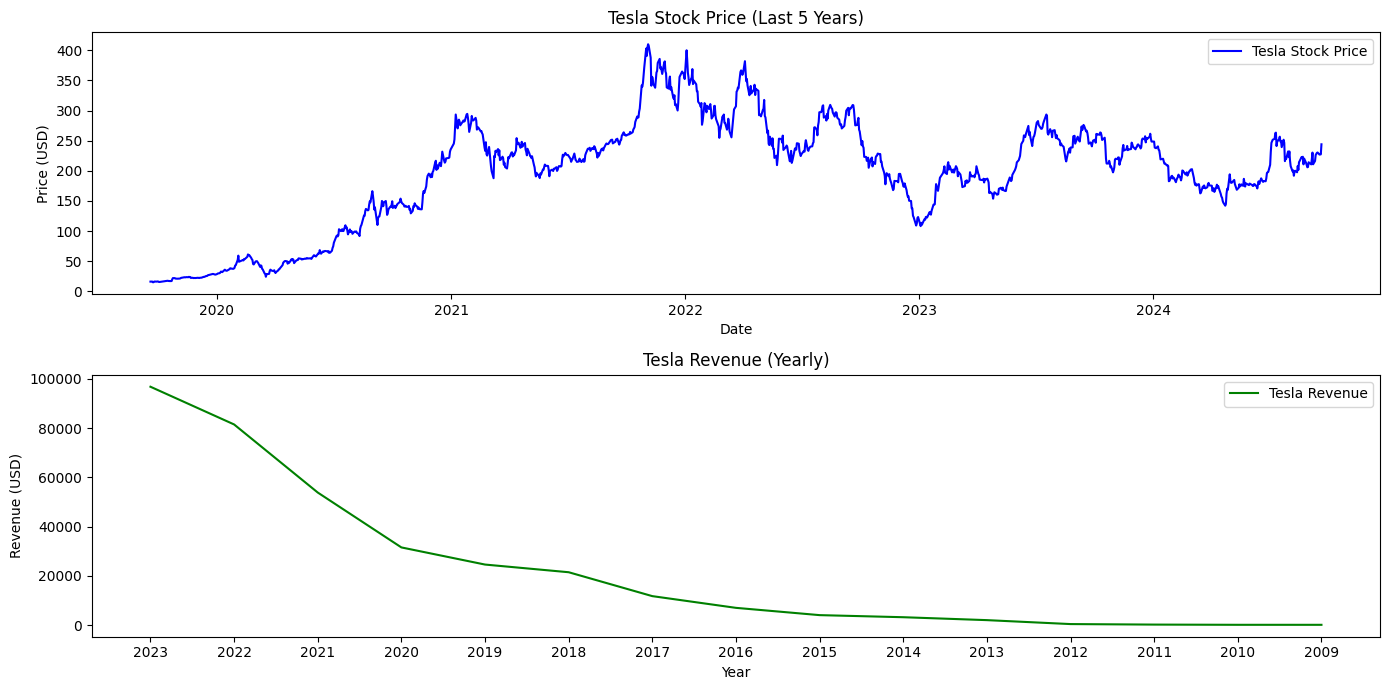

In [23]:
import matplotlib.pyplot as plt


# Extract Tesla stock data using yfinance
tesla = yf.Ticker("TSLA")
tesla_stock_data = tesla.history(period="5y")

# Extract Tesla revenue data from MacroTrends
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', {'class': 'historical_data_table table'})
rows = table.find_all('tr')
tesla_revenue_data = []
for row in rows[1:]:
    cells = row.find_all('td')
    if len(cells) >= 2:
        date = cells[0].text.strip()
        revenue = cells[1].text.strip()
        tesla_revenue_data.append((date, revenue))

# Plot Tesla Stock Data
plt.figure(figsize=(14, 7))

# Subplot 1: Tesla Stock Price
plt.subplot(2, 1, 1)
plt.plot(tesla_stock_data.index, tesla_stock_data['Close'], label="Tesla Stock Price", color='blue')
plt.title("Tesla Stock Price (Last 5 Years)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()

# Subplot 2: Tesla Revenue Data
dates, revenues = zip(*tesla_revenue_data)
plt.subplot(2, 1, 2)
plt.plot(dates, [float(revenue.replace(',', '').replace('$', '')) for revenue in revenues], label="Tesla Revenue", color='green')
plt.title("Tesla Revenue (Yearly)")
plt.xlabel("Year")
plt.ylabel("Revenue (USD)")
plt.legend()

# Display the dashboard
plt.tight_layout()
plt.show()


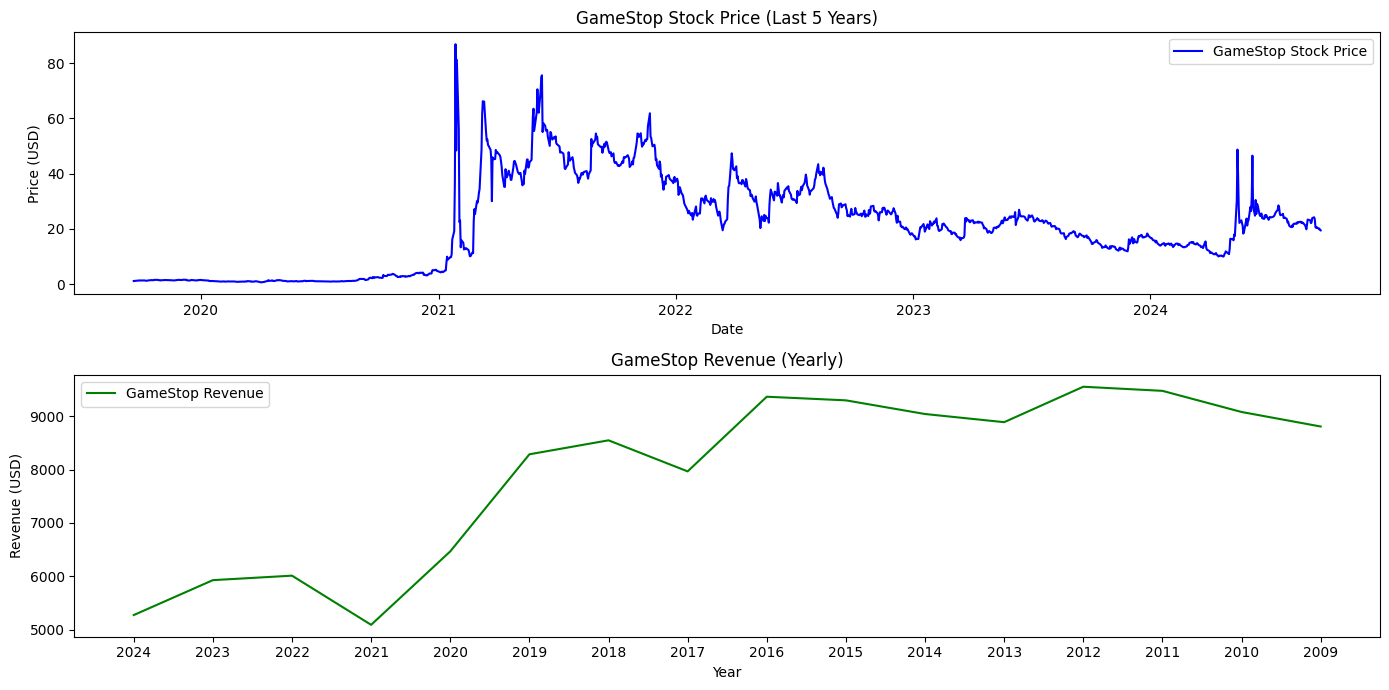

In [24]:
# Extract GameStop stock data using yfinance
gamestop = yf.Ticker("GME")
gamestop_stock_data = gamestop.history(period="5y")

# Extract GameStop revenue data from MacroTrends
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', {'class': 'historical_data_table table'})
rows = table.find_all('tr')
gamestop_revenue_data = []
for row in rows[1:]:
    cells = row.find_all('td')
    if len(cells) >= 2:
        date = cells[0].text.strip()
        revenue = cells[1].text.strip()
        gamestop_revenue_data.append((date, revenue))

# Plot GameStop Stock Data
plt.figure(figsize=(14, 7))

# Subplot 1: GameStop Stock Price
plt.subplot(2, 1, 1)
plt.plot(gamestop_stock_data.index, gamestop_stock_data['Close'], label="GameStop Stock Price", color='blue')
plt.title("GameStop Stock Price (Last 5 Years)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()

# Subplot 2: GameStop Revenue Data
dates, revenues = zip(*gamestop_revenue_data)
plt.subplot(2, 1, 2)
plt.plot(dates, [float(revenue.replace(',', '').replace('$', '')) for revenue in revenues], label="GameStop Revenue", color='green')
plt.title("GameStop Revenue (Yearly)")
plt.xlabel("Year")
plt.ylabel("Revenue (USD)")
plt.legend()

# Display the dashboard
plt.tight_layout()
plt.show()
